In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

#### Reading Data

In [2]:
df= pd.read_csv('/Users/ayano/Desktop/Data Science & AI/csv/income_evaluation.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Data Processing and Visualisations

In [4]:
df=df.drop(' fnlwgt', axis=1)

In [5]:
df=df.drop(' education', axis=1)

In [6]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Identifying categorical variables 

In [7]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 8
Categorical columns:
[' workclass', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']


#### Identifying numerical variable

In [8]:
num_cols = [x for x in df.select_dtypes(include=["number"]).columns
            if x not in cat_cols
            if x not in [" income"]]
print(f"Number of numerical columns: {len(num_cols)}")
print(f"Numerical columns:\n{num_cols}")

Number of numerical columns: 5
Numerical columns:
['age', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


#### Checking for missing values

In [9]:
# List of columns that have null values
features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

# Precentage of missing data
missing_values_df = pd.DataFrame(df[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df.head(10)

,percentage


In [10]:
# How many features are missing more than some threshold
print(
    f"25% : {len(missing_values_df[missing_values_df['percentage'] > 0.25])}\n\
50% :  {len(missing_values_df[missing_values_df['percentage'] > 0.50])}\n\
75% :  {len(missing_values_df[missing_values_df['percentage'] > 0.75])}\n\
80% :  {len(missing_values_df[missing_values_df['percentage'] > 0.80])}\n\
90% :  {len(missing_values_df[missing_values_df['percentage'] > 0.90])}\n"
)

25% : 0
50% :  0
75% :  0
80% :  0
90% :  0



#### Filling in NaN values

In [11]:
from sklearn.impute import SimpleImputer

# create an imputer object
imputer = SimpleImputer(strategy='mean')

# impute NaN values in numeric columns
numeric_columns = num_cols
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# impute NaN values in categorical columns
categorical_columns = cat_cols
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [12]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [13]:
df.columns

Index(['age', ' workclass', ' education-num', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' native-country', ' income'],
      dtype='object')

### Creating Visualisations with the given data

#### 1. Target Variable Income

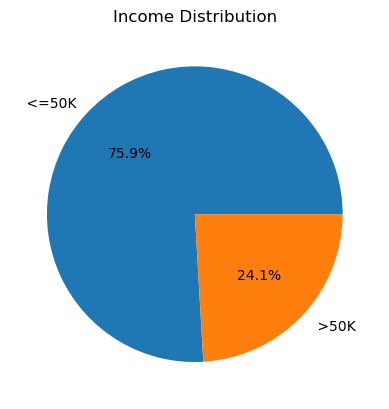

In [14]:
income_counts = df[' income'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Income Distribution')
plt.show()

#### 2. Individual features and their relationship with the target variable

##### Occupation and Income

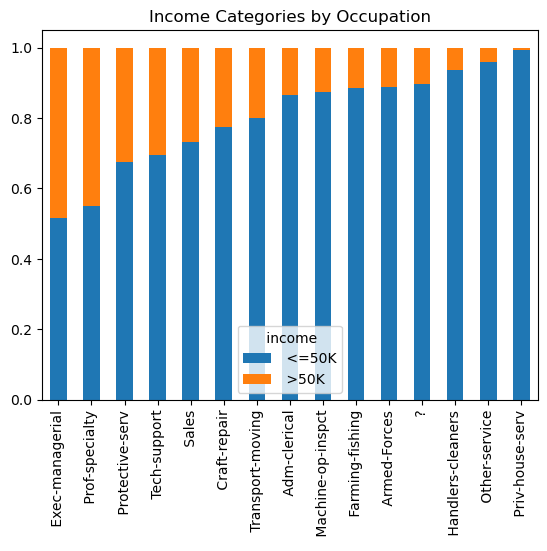

In [15]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(df[' occupation'], df[' income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Occupation')
plt.xticks(rotation=90)
plt.show()

#### Income distribution by Race and Sex

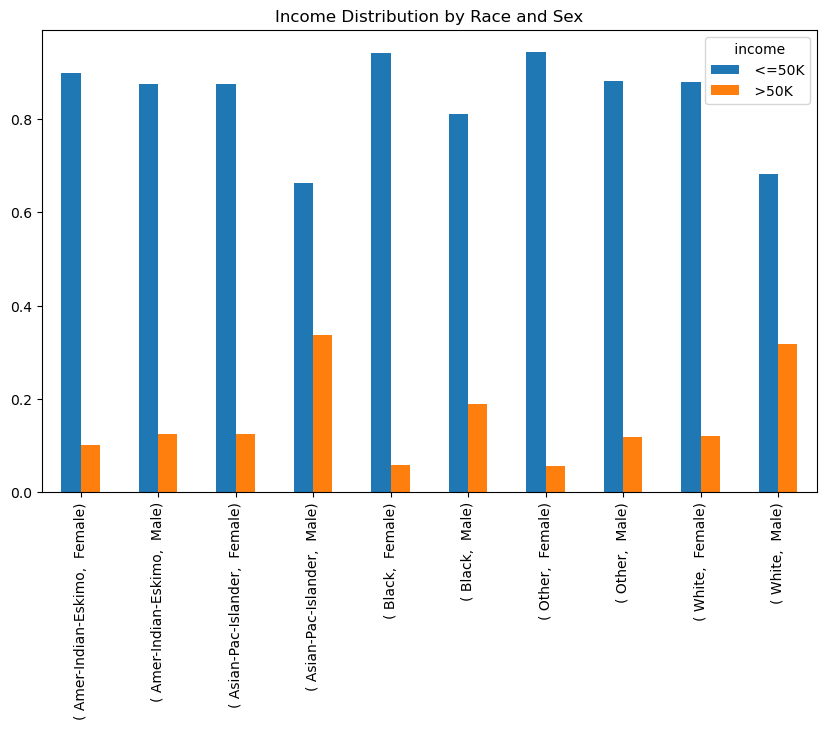

In [16]:
ct = pd.crosstab(index=[df[' race'], df[' sex']], columns=df[' income'], normalize='index')
ct.plot(kind='bar', figsize=(10, 6))# create a grouped bar chart
plt.title('Income Distribution by Race and Sex')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Distribution of marital status

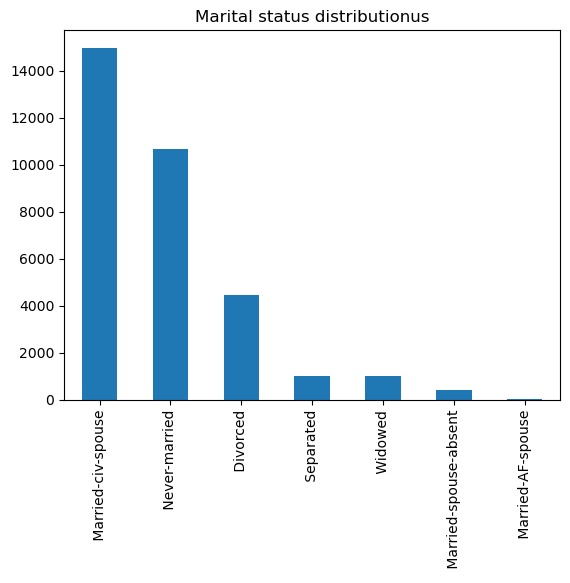

In [17]:
df[' marital-status'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('')
plt.title('Marital status distributionus')
plt.show()

#### Relationship between marital status and income

<Axes: xlabel=' income', ylabel=' marital-status'>

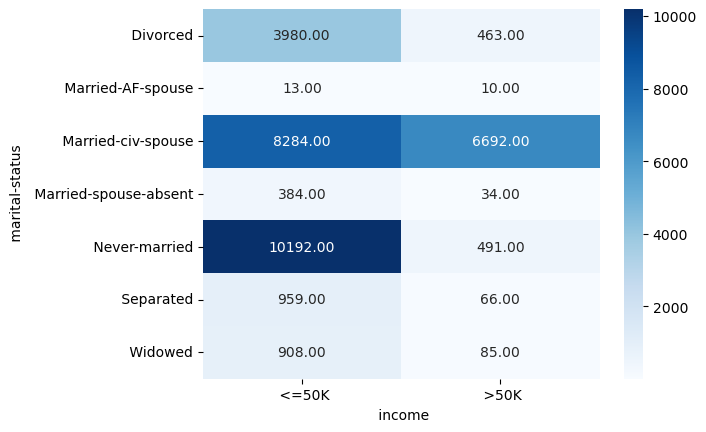

In [18]:
table = pd.crosstab(df[' marital-status'], df[' income'])
sns.heatmap(table, annot=True, fmt='.2f', cmap='Blues')

#### Distribution of income by age and hours worked per week

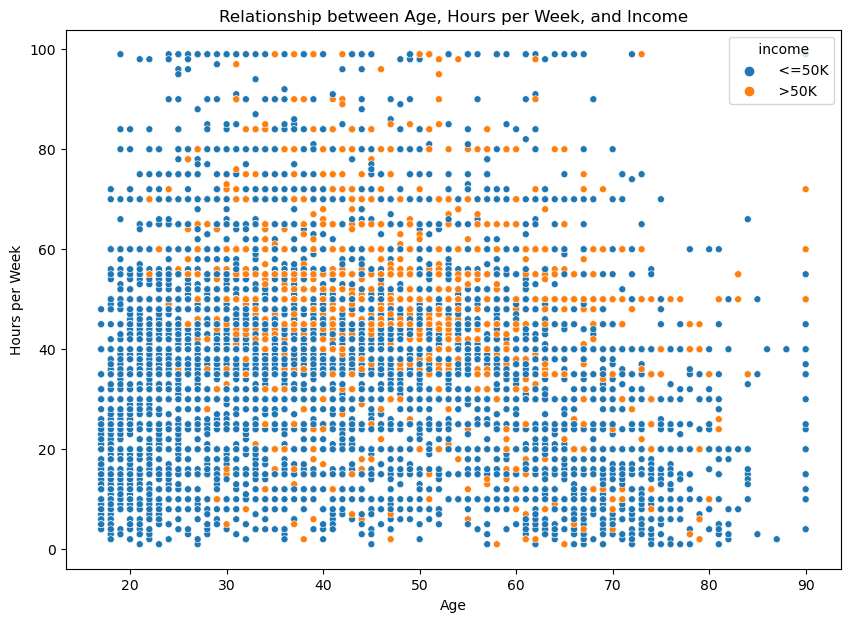

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x= "age", y=" hours-per-week", hue=" income", s=25)
plt.title("Relationship between Age, Hours per Week, and Income")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.show()

#### Distribution of income by age and sex

<Axes: xlabel=' sex', ylabel='age'>

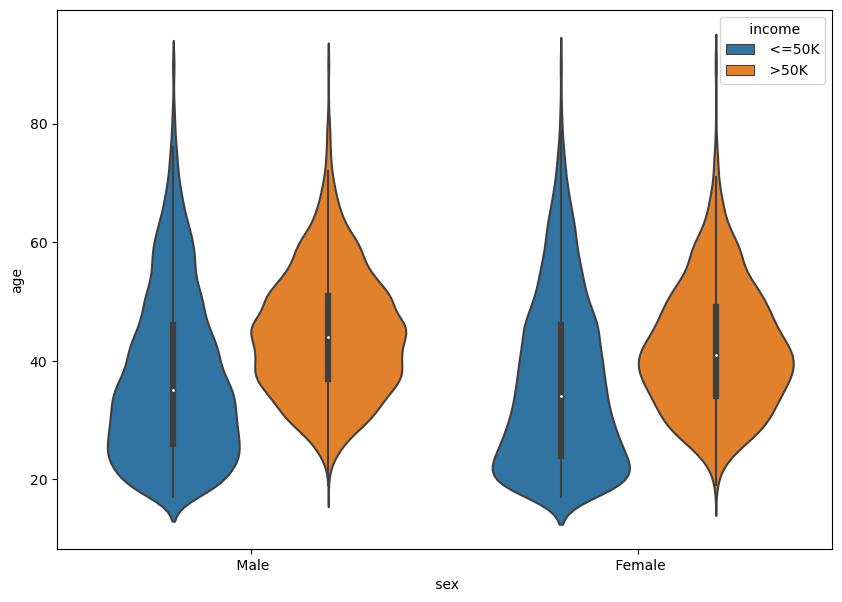

In [20]:
plt.figure(figsize=(10,7))
# create a violin plot with sex on the x-axis, age on the y-axis, and income as the hue
sns.violinplot(data=df, x=' sex', y='age', hue=' income')


### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# # encode the target variable
# y = le.fit_transform(df)

# encode categorical variables in the DataFrame
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [22]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,0
1,50.0,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39,0
2,38.0,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39,0
3,53.0,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39,0
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39,0
32557,40.0,4,9.0,2,7,0,4,1,0.0,0.0,40.0,39,1
32558,58.0,4,9.0,6,1,4,4,0,0.0,0.0,40.0,39,0
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39,0


In [23]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['age', ' workclass', ' education-num', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country', ' income']


In [24]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,0
1,50.0,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39,0
2,38.0,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39,0
3,53.0,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39,0
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39,0
32557,40.0,4,9.0,2,7,0,4,1,0.0,0.0,40.0,39,1
32558,58.0,4,9.0,6,1,4,4,0,0.0,0.0,40.0,39,0
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39,0


### Scaling the data with Min-Max Scaler

In [25]:
# Min Max Scaler: transformation of data

names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,0.875,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


### Setting target variable

In [26]:
y = data_scaled[' income']

# Extract the input features
X_data = data_scaled.drop([' income'], axis=1)

### Feature Engineering

#### Pearsons Correlation

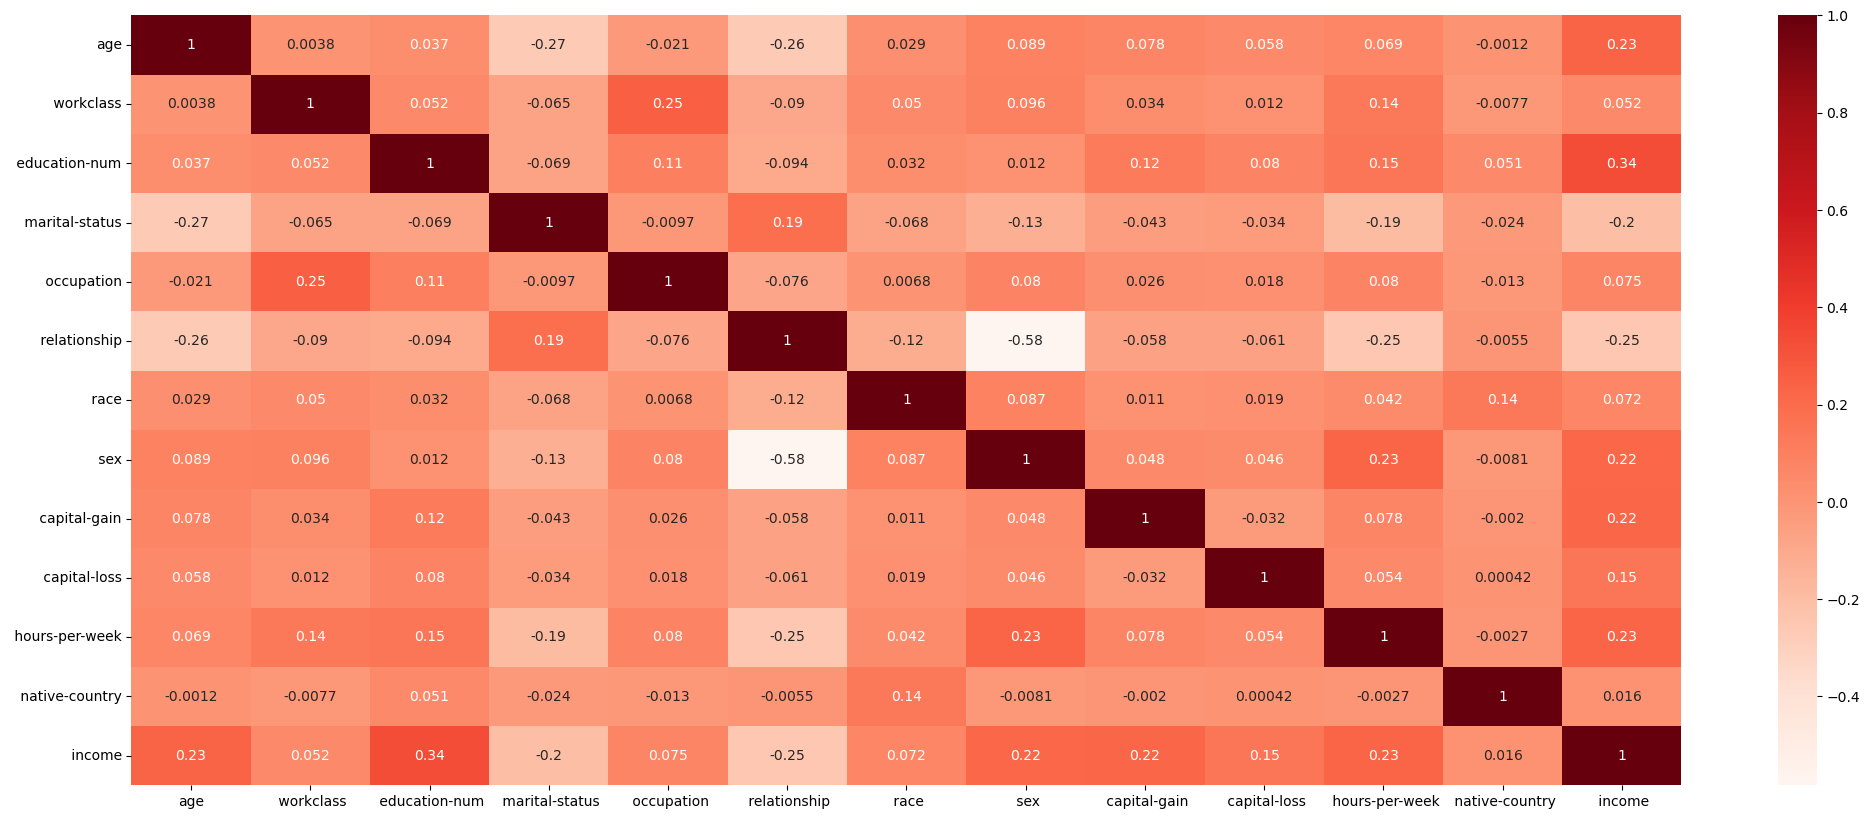

In [27]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
#Correlation with target variable price
cor_target = abs(cor[" income"])

relevant_features = cor_target
relevant_features 

age                0.234037
 workclass         0.051604
 education-num     0.335154
 marital-status    0.199307
 occupation        0.075468
 relationship      0.250918
 race              0.071846
 sex               0.215980
 capital-gain      0.223329
 capital-loss      0.150526
 hours-per-week    0.229689
 native-country    0.015840
 income            1.000000
Name:  income, dtype: float64

#### KBest Features

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=7)
X_important = selector.fit_transform(X_data, y)
mask = selector.get_support()
important_feature_names = X_data.columns[mask]

print(important_feature_names)

Index(['age', ' education-num', ' marital-status', ' relationship', ' sex',
       ' capital-gain', ' hours-per-week'],
      dtype='object')


In [30]:
X = data_scaled.drop([' workclass', ' occupation', ' race', ' native-country',
       ' income'],1)  #Feature Matrix
                     
y = data_scaled[" income"]          #Target Variable


/var/folders/0z/jn67d04d61x09rscj406r8zr0000gn/T/ipykernel_37486/3695558829.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_scaled.drop([' workclass', ' occupation', ' race', ' native-country',


In [31]:
X

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
0,0.301370,0.800000,0.666667,0.2,1.0,0.021740,0.0,0.397959
1,0.452055,0.800000,0.333333,0.0,1.0,0.000000,0.0,0.122449
2,0.287671,0.533333,0.000000,0.2,1.0,0.000000,0.0,0.397959
3,0.493151,0.400000,0.333333,0.0,1.0,0.000000,0.0,0.397959
4,0.150685,0.800000,0.333333,1.0,0.0,0.000000,0.0,0.397959
...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.333333,1.0,0.0,0.000000,0.0,0.377551
32557,0.315068,0.533333,0.333333,0.0,1.0,0.000000,0.0,0.397959
32558,0.561644,0.533333,1.000000,0.8,0.0,0.000000,0.0,0.397959
32559,0.068493,0.533333,0.666667,0.6,1.0,0.000000,0.0,0.193878


In [32]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    1.0
32558    0.0
32559    0.0
32560    1.0
Name:  income, Length: 32561, dtype: float64

## Splitting data into Training and testing sets

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

## Building models and evaluating their performances

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create model objects
lr = LogisticRegression()
svc = SVC()
nb = GaussianNB()

# Fit the models on the training data
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Predict on the training data
y_train_pred_lr = lr.predict(X_train)
y_train_pred_svc = svc.predict(X_train)
y_train_pred_nb = nb.predict(X_train)

# Predict on the test data
y_test_pred_lr = lr.predict(X_test)
y_test_pred_svc = svc.predict(X_test)
y_test_pred_nb = nb.predict(X_test)

# Calculate the train and test accuracy for each model
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)

train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

# Print the train and test accuracy for each model
print("Logistic Regression Train accuracy: {:}".format(train_accuracy_lr))
print("Logistic Regression Test accuracy: {:}".format(test_accuracy_lr))

print("SVC Train accuracy: {:}".format(train_accuracy_svc))
print("SVC Test accuracy: {:}".format(test_accuracy_svc))

print("Naive Bayes Train accuracy: {:}".format(train_accuracy_nb))
print("Naive Bayes Test accuracy: {:}".format(test_accuracy_nb))

Logistic Regression Train accuracy: 0.8227503071253072
Logistic Regression Test accuracy: 0.8229694457239367
SVC Train accuracy: 0.847512285012285
SVC Test accuracy: 0.8472286196837095
Naive Bayes Train accuracy: 0.799831081081081
Naive Bayes Test accuracy: 0.7970213419315215
